<a href="https://colab.research.google.com/github/VladislavErmakovich/TMSds/blob/develop/lesson17/hw17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('bodyfat.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


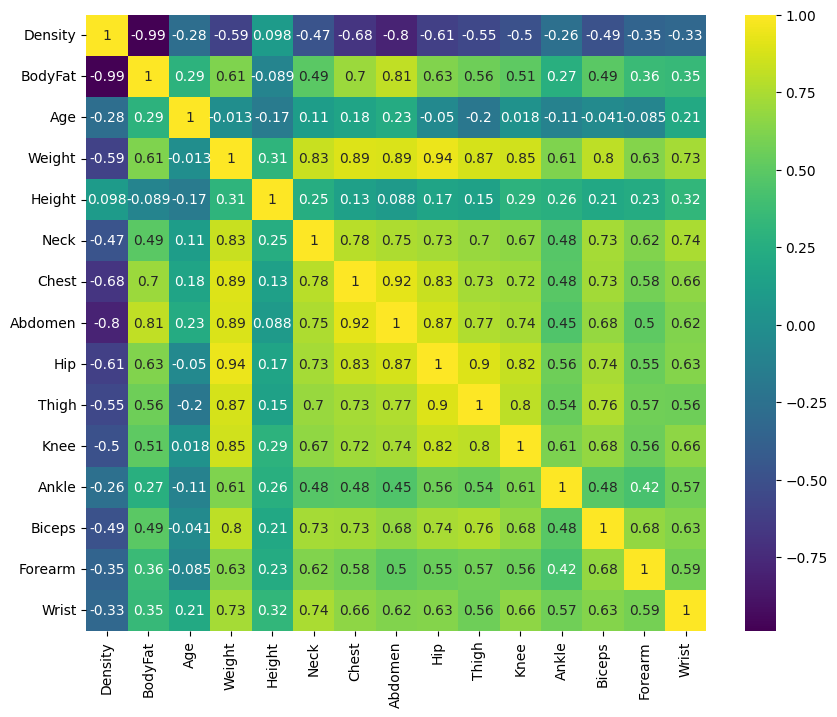

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(), cmap='viridis', annot= True)

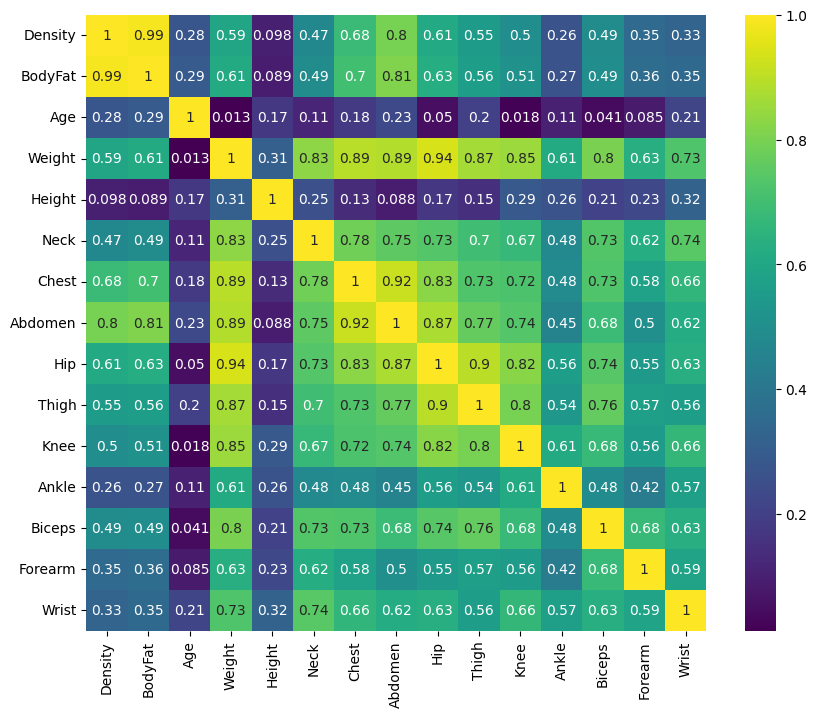

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr().abs(), cmap='viridis', annot= True)

Density - плотность

BodyFat - процент подкожного жира

Age (years) - возрост

Weight (lbs) - вес

Height (inches) - рост

Neck circumference (cm) - обхват шеи

Chest circumference (cm) - обхват груди

Abdomen 2 circumference (cm) - окружность живота

Hip circumference (cm) - обхват бедер

Thigh circumference (cm) - обхват бедра

Knee circumference (cm) - обхват колена

Ankle circumference (cm) - обхват лодыжек

Biceps (extended) circumference (cm) - обхват бицепса

Forearm circumference (cm) - обхват предплечья

Wrist circumference (cm) - обхват запястья

In [ ]:
df1 = df.drop(['Density'], axis = 1)

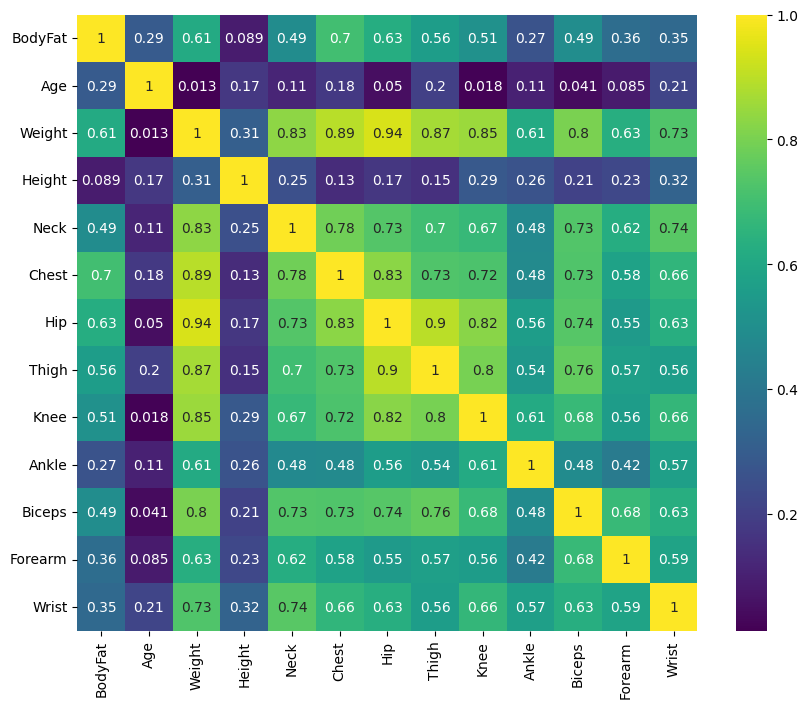

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df1.corr().abs(), cmap='viridis', annot= True)

In [ ]:
df['BodyFat'].describe()

count    252.000000
mean      19.150794
std        8.368740
min        0.000000
25%       12.475000
50%       19.200000
75%       25.300000
max       47.500000
Name: BodyFat, dtype: float64

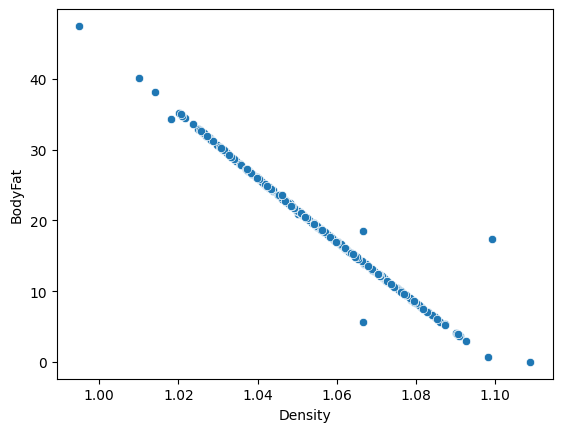

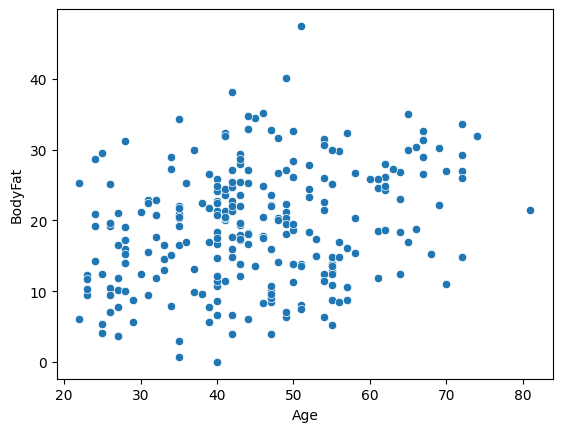

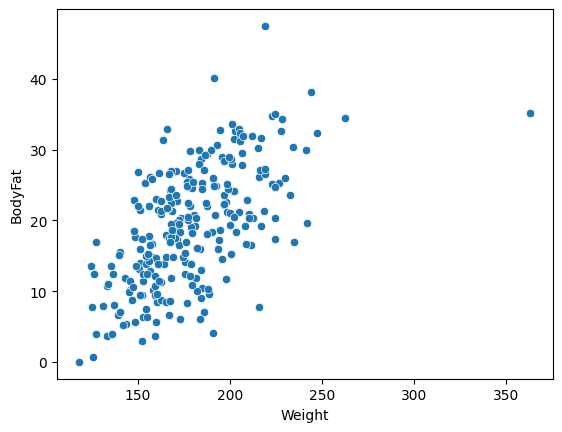

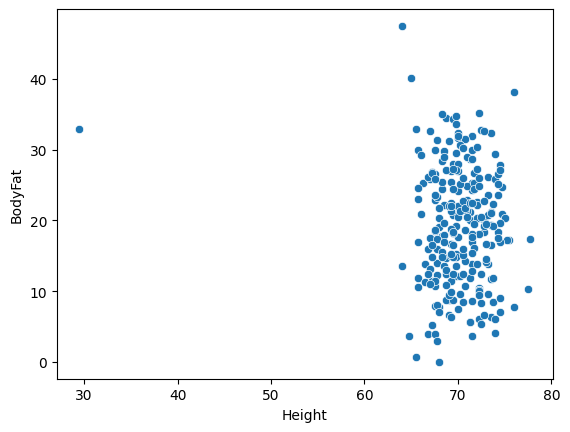

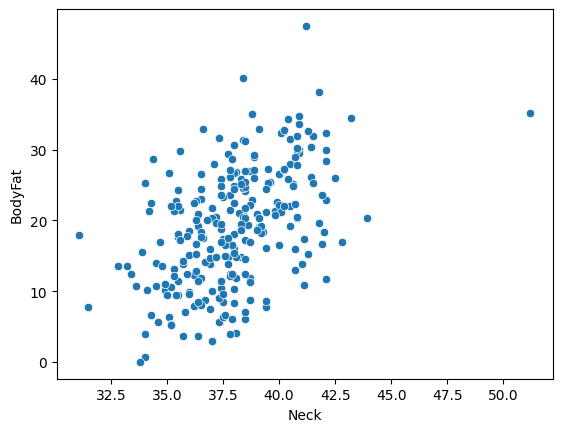

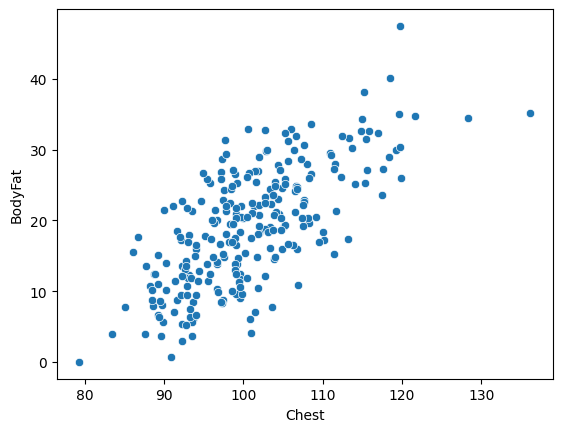

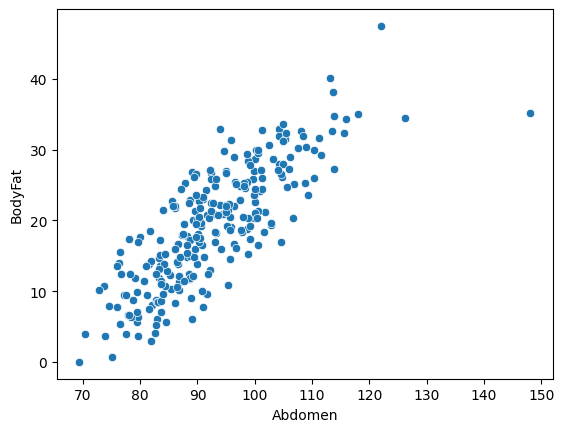

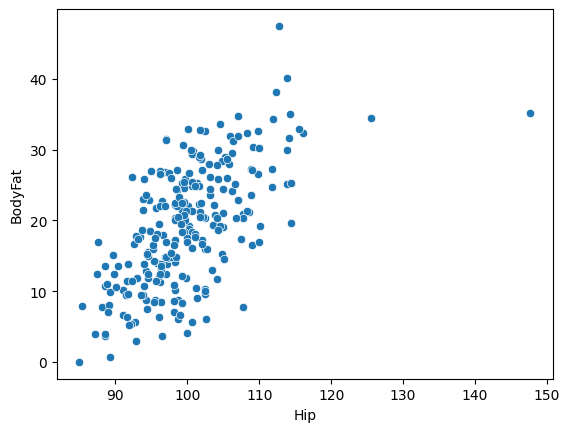

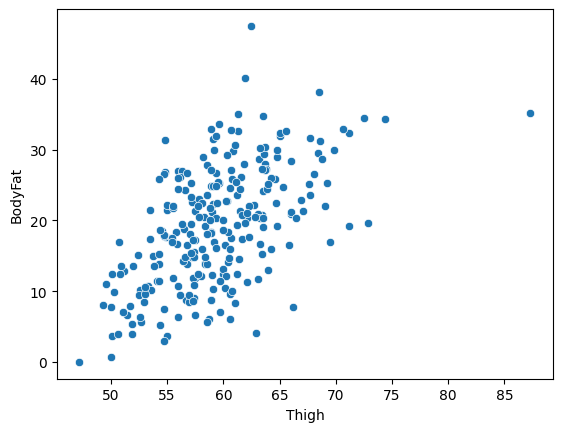

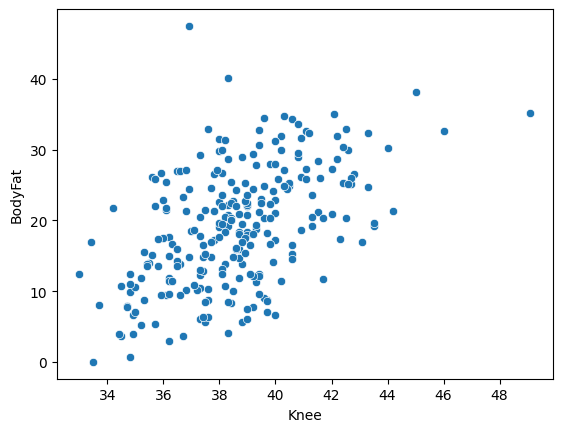

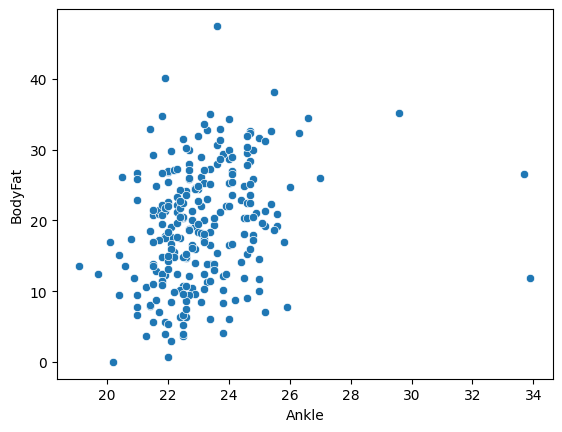

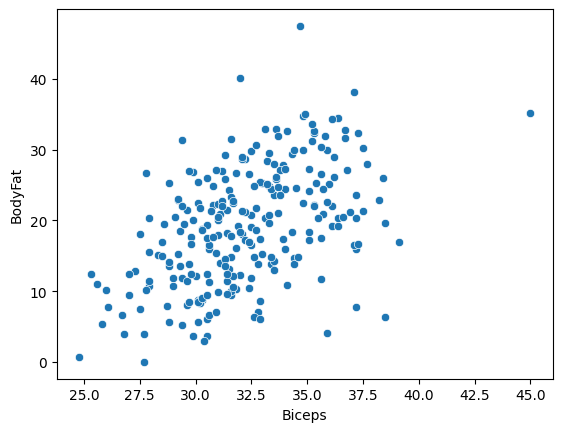

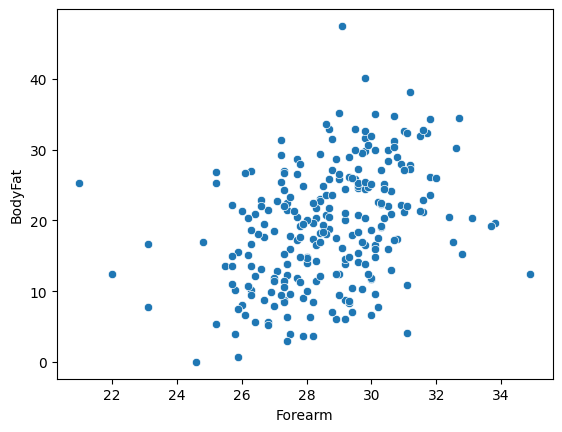

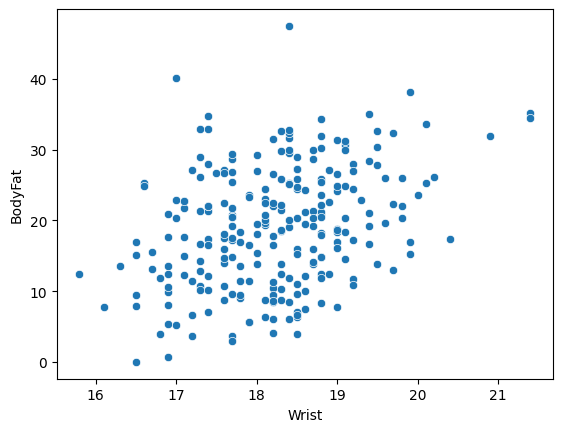

In [ ]:
for column, val in df[:-1].items():
  if column != 'BodyFat':
    sns.scatterplot(data=df, x = column, y = 'BodyFat',palette='viridis')
    plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# **Линейная регрессия**

In [ ]:
X = df.drop(['BodyFat'], axis = 1)
y = df['BodyFat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
cv_scores = cross_val_score(model, X, y, cv=3)
print(f'Значения при кросс-валидации(фолд = 3):\n{cv_scores}')


MAE: 0.5896611625074017
Значения при кросс-валидации(фолд = 3):
[0.98236415 0.89260472 0.99020209]


In [ ]:
X = df1.drop(['BodyFat'], axis = 1)
y = df1['BodyFat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
cv_scores = cross_val_score(model, X, y, cv=3)
print(f'Значения при кросс-валидации(фолд = 3):\n{cv_scores}')


MAE: 3.2086088127346772
Значения при кросс-валидации(фолд = 3):
[0.74588112 0.45353876 0.69878768]


In [ ]:
model = Lasso(alpha=0.0000001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
cv_scores = cross_val_score(model, X, y, cv=3)
print(f'Значения при кросс-валидации(фолд = 3):\n{cv_scores}')


MAE: 3.208608797082204
Значения при кросс-валидации(фолд = 3):
[0.74588113 0.45353876 0.69878769]


In [ ]:
model = Ridge(alpha=0.00001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
cv_scores = cross_val_score(model, X, y, cv=3)
print(f'Значения при кросс-валидации(фолд = 3):\n{cv_scores}')


MAE: 3.2086088029993554
Значения при кросс-валидации(фолд = 3):
[0.74588113 0.45353876 0.69878769]


# **SVM регрессия**

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

In [ ]:
X = df.drop(['BodyFat'], axis = 1)
y = df['BodyFat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

In [ ]:
model = SVR(kernel = 'linear',max_iter=10000000, epsilon=0.002)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
cv_scores = cross_val_score(model, X, y, cv=3)
print(f'Значения при кросс-валидации(фолд = 3):\n{cv_scores}')

MAE: 3.566813582223408
Значения при кросс-валидации(фолд = 3):
[0.74516681 0.31293176 0.71740919]


In [ ]:
model = LinearSVR(epsilon=0.1, C=0.001, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
cv_scores = cross_val_score(model, X, y, cv=3)
print(f'Значения при кросс-валидации(фолд = 3):\n{cv_scores}')

MAE: 4.139579311019755
Значения при кросс-валидации(фолд = 3):
[0.60556052 0.35840001 0.62795361]


# **Логистическая регрессия**

In [ ]:
df_classificatin = df.copy()

In [ ]:
#df['BodyFat'].median()

19.2

In [ ]:
#for index, row in df_classificatin.iterrows():
#    if row['BodyFat'] < 19.2:
#        df_classificatin.loc[index, 'BodyFat'] = 'Low'
#    else:
#        df_classificatin.loc[index, 'BodyFat'] = 'High'

In [ ]:
for index, row in df_classificatin.iterrows():
    if row['BodyFat'] < 10:
        df_classificatin.loc[index, 'BodyFat'] = 'Very Low'
    elif row['BodyFat'] >= 10 and row['BodyFat'] < 20:
        df_classificatin.loc[index, 'BodyFat'] = 'Low'
    elif row['BodyFat'] >= 20 and row['BodyFat'] < 30:
        df_classificatin.loc[index, 'BodyFat'] = 'Average'
    else:
        df_classificatin.loc[index, 'BodyFat'] = 'High'

In [ ]:
df_classificatin['BodyFat'].unique()

array(['Low', 'Very Low', 'Average', 'High'], dtype=object)

In [ ]:
df_classificatin[df_classificatin['BodyFat']=='Low'].count()

Density    93
BodyFat    93
Age        93
Weight     93
Height     93
Neck       93
Chest      93
Abdomen    93
Hip        93
Thigh      93
Knee       93
Ankle      93
Biceps     93
Forearm    93
Wrist      93
dtype: int64

In [ ]:
df_classificatin[df_classificatin['BodyFat']=='Very Low'].count()

Density    39
BodyFat    39
Age        39
Weight     39
Height     39
Neck       39
Chest      39
Abdomen    39
Hip        39
Thigh      39
Knee       39
Ankle      39
Biceps     39
Forearm    39
Wrist      39
dtype: int64

In [ ]:
df_classificatin[df_classificatin['BodyFat']=='Average'].count()

Density    94
BodyFat    94
Age        94
Weight     94
Height     94
Neck       94
Chest      94
Abdomen    94
Hip        94
Thigh      94
Knee       94
Ankle      94
Biceps     94
Forearm    94
Wrist      94
dtype: int64

In [ ]:
df_classificatin[df_classificatin['BodyFat']=='High'].count()

Density    26
BodyFat    26
Age        26
Weight     26
Height     26
Neck       26
Chest      26
Abdomen    26
Hip        26
Thigh      26
Knee       26
Ankle      26
Biceps     26
Forearm    26
Wrist      26
dtype: int64

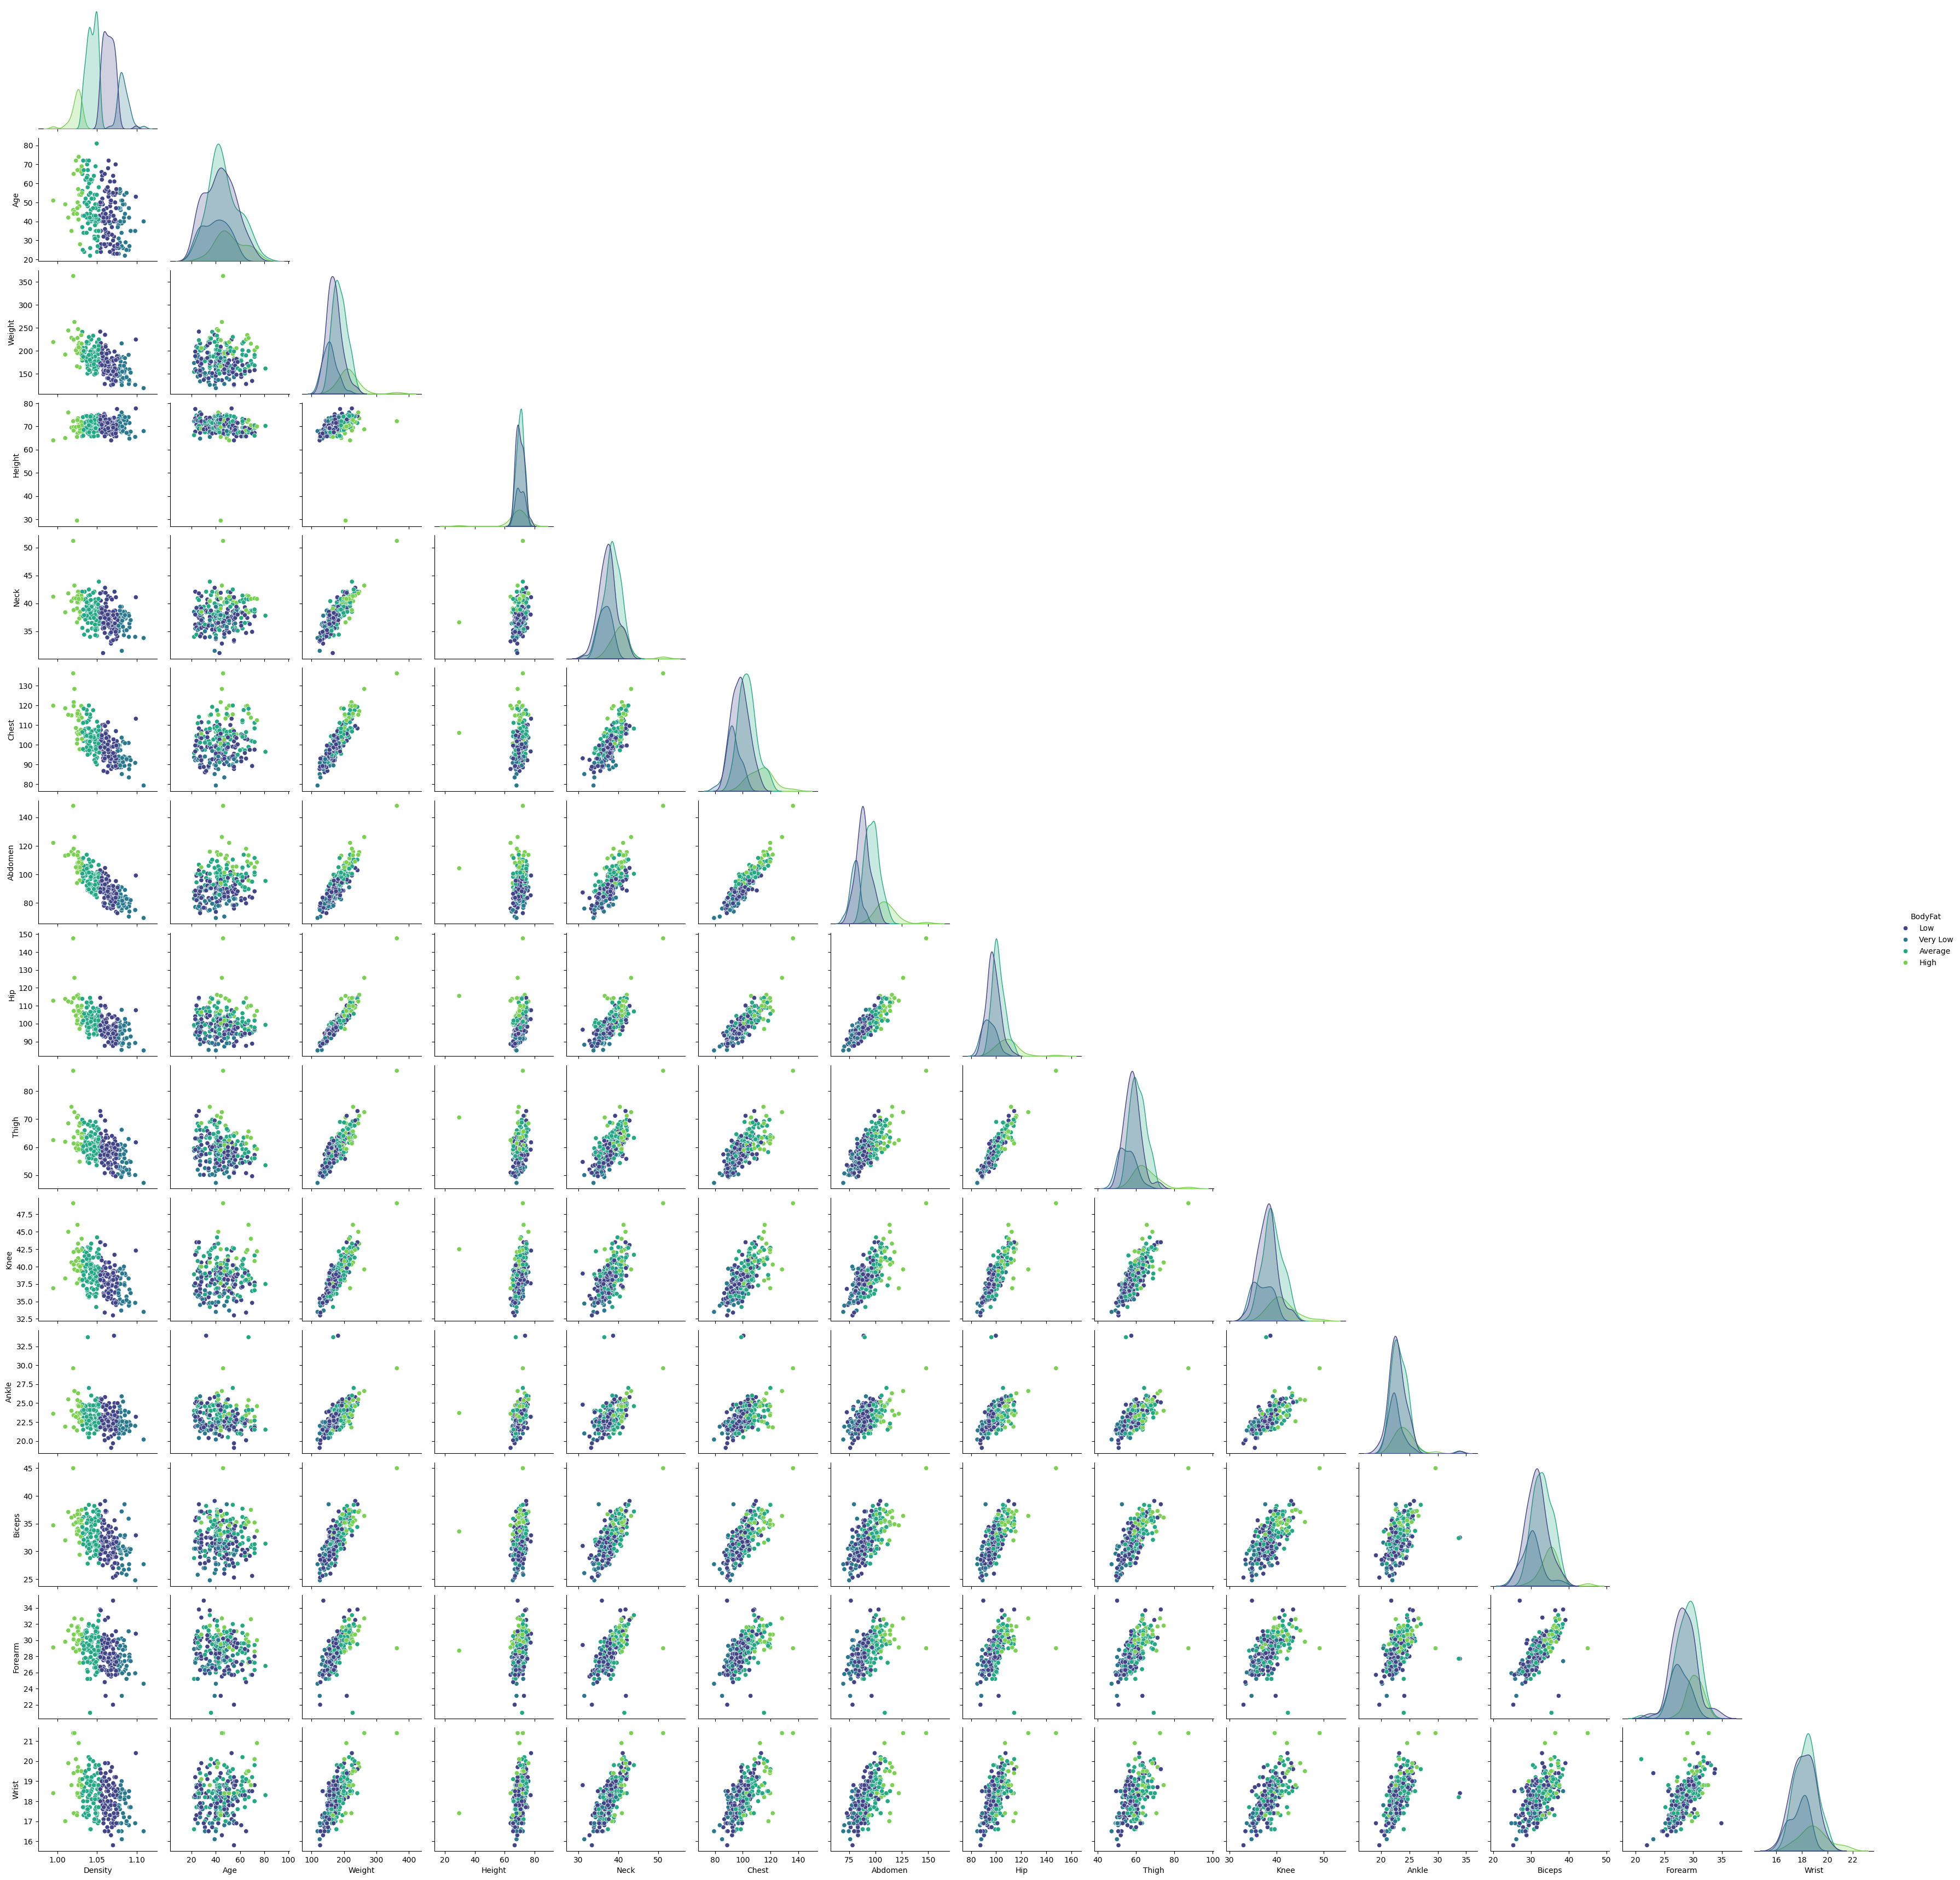

In [ ]:
sns.pairplot(data=df_classificatin, hue='BodyFat', palette='viridis',corner=True)

In [199]:
X = df_classificatin.drop(['BodyFat'], axis = 1)
y = df_classificatin['BodyFat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [200]:
model = LogisticRegression(solver='liblinear', max_iter = 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy}\n')

print(f'F1: {f1_score(y_test, y_pred, average=None)}')

matrix = confusion_matrix(y_test, y_pred)
print(f'\nMatrix:\n{matrix}')

cv_scores = cross_val_score(model, X, y, cv=3)
print(f'\nЗначения при кросс-валидации(фолд = 3):\n{cv_scores}')

Accuracy = 0.7142857142857143

F1: [0.78431373 0.83333333 0.66666667 0.53333333]

Matrix:
[[20  2  5  0]
 [ 0  5  0  0]
 [ 4  0 16  3]
 [ 0  0  4  4]]

Значения при кросс-валидации(фолд = 3):
[0.60714286 0.52380952 0.48809524]


# **SVM классификация**

In [191]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [192]:
X = df_classificatin.drop(['BodyFat'], axis = 1)
y = df_classificatin['BodyFat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [198]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy}\n')

print(f'F1: {f1_score(y_test, y_pred, average=None)}')

matrix = confusion_matrix(y_test, y_pred)
print(f'\nMatrix:\n{matrix}\n')

cv_scores = cross_val_score(model, X, y, cv=3)
print(f'Значения при кросс-валидации(фолд = 3):\n{cv_scores}')

Accuracy = 0.6984126984126984

F1: [0.76       0.72727273 0.66666667 0.58823529]

Matrix:
[[19  2  6  0]
 [ 1  4  0  0]
 [ 3  0 16  4]
 [ 0  0  3  5]]

Значения при кросс-валидации(фолд = 3):
[0.58333333 0.57142857 0.57142857]


In [201]:
model = LinearSVC(C=0.0002, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy}\n')

print(f'F1: {f1_score(y_test, y_pred, average=None)}')

matrix = confusion_matrix(y_test, y_pred)
print(f'\nMatrix:\n{matrix}\n')

cv_scores = cross_val_score(model, X, y, cv=3)
print(f'Значения при кросс-валидации(фолд = 3):\n{cv_scores}')

Accuracy = 0.6031746031746031

F1: [0.67924528 0.         0.65517241 0.2       ]

Matrix:
[[18  0  9  0]
 [ 5  0  0  0]
 [ 3  0 19  1]
 [ 0  0  7  1]]

Значения при кросс-валидации(фолд = 3):
[0.55952381 0.48809524 0.4047619 ]
